<a href="https://colab.research.google.com/github/rupali-p/nepali-digit-classifier/blob/initial-model/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

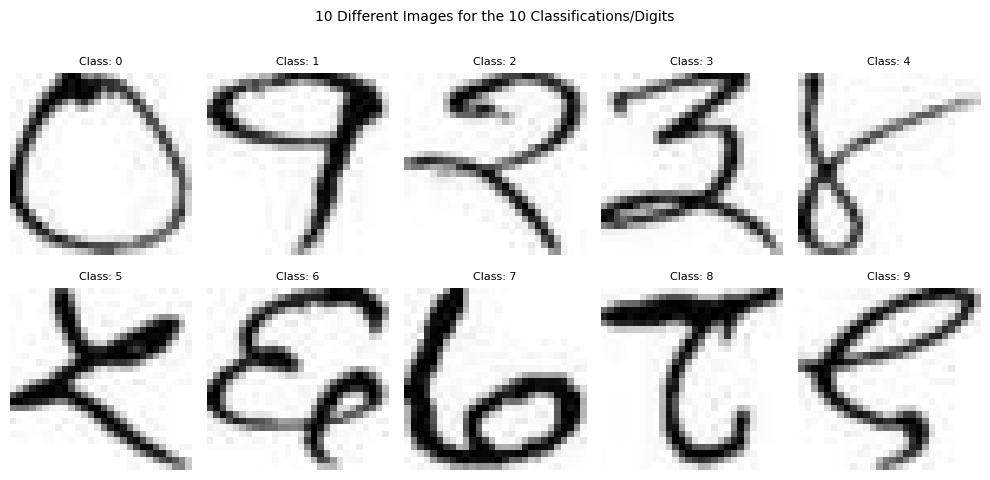

In [ ]:
# Problem
#  "Feedforward Neural Network" or a "Multi-Layer Perceptron (MLP)"

## **Step 1: Setting up project structure and dataset for NN**

### Connecting to Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [27]:
# Importing all the required libraries
import os
import sys
import zipfile
import tensorflow as tf
import numpy as np
from PIL import Image
import shutil
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


### Dataset Prep

#### Unzipping preprocessed combined dataset

In [3]:
%cd '/content/gdrive/Shareddrives/31005_Machine_Learning'
%ls

/content/gdrive/Shareddrives/31005_Machine_Learning
dataset/  dataset.zip  labels.csv  ML.ipynb  nhcd/  trial/


In [ ]:
# !unzip dataset.zip DO NOT RUN AGAIN

Streaming output truncated to the last 5000 lines.
  inflating: nhcd/nhcd/numerals/1/028_01.jpg  
  inflating: nhcd/nhcd/numerals/1/028_02.jpg  
  inflating: nhcd/nhcd/numerals/1/028_03.jpg  
  inflating: nhcd/nhcd/numerals/1/028_04.jpg  
  inflating: nhcd/nhcd/numerals/1/028_05.jpg  
  inflating: nhcd/nhcd/numerals/1/029_01.jpg  
  inflating: nhcd/nhcd/numerals/1/030_01.jpg  
  inflating: nhcd/nhcd/numerals/1/030_02.jpg  
  inflating: nhcd/nhcd/numerals/1/030_03.jpg  
  inflating: nhcd/nhcd/numerals/1/030_04.jpg  
  inflating: nhcd/nhcd/numerals/1/032_01.jpg  
  inflating: nhcd/nhcd/numerals/1/032_02.jpg  
  inflating: nhcd/nhcd/numerals/1/033_01.jpg  
  inflating: nhcd/nhcd/numerals/1/033_02.jpg  
  inflating: nhcd/nhcd/numerals/1/034_01.jpg  
  inflating: nhcd/nhcd/numerals/1/034_02.jpg  
  inflating: nhcd/nhcd/numerals/1/035_01.jpg  
  inflating: nhcd/nhcd/numerals/1/035_02.jpg  
  inflating: nhcd/nhcd/numerals/1/036_01.jpg  
  inflating: nhcd/nhcd/numerals/1/036_02.jpg  
  inflati

In [ ]:
# !mkdir '/content/gdrive/Shareddrives/31005_Machine_Learning/dataset' # already made - DO NOT RUN AGAIN

In [ ]:
# !mkdir '/content/gdrive/Shareddrives/31005_Machine_Learning/trial' # already made - DO NOT RUN AGAIN

In [7]:
# Define the source directory where the digit folders are located
source_dir = '/content/gdrive/Shareddrives/31005_Machine_Learning/dataset/numerals'

# Define the destination directories for train, validation, and test splits
train_dir = '/content/gdrive/Shareddrives/31005_Machine_Learning/trial/dataset/numerals_train'
validation_dir = '/content/gdrive/Shareddrives/31005_Machine_Learning/trial/dataset/numerals_validation'
test_dir = '/content/gdrive/Shareddrives/31005_Machine_Learning/trial/dataset/numerals_test'


np.random.seed(0) # This is done to ensure reproducibility in random number generation

# Define the class labels and output size
class_labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
output_size = len(class_labels)

In [ ]:
# # Create destination directories if they don't exist
# for directory in [train_dir, validation_dir, test_dir]:
#     if not os.path.exists(directory):
#         os.makedirs(directory)

# %pwd ## everything is like /content/gdrive/Shareddrives/31005_Machine_Learning/trial/dataset/numerals_test
#  DO NOT RUN AGAIN

'/content/gdrive/Shareddrives/31005_Machine_Learning/trial'

In [ ]:
# %cd /content/gdrive/Shareddrives/31005_Machine_Learning/trial
# # Initialize counters for each class
# class_counts = {str(i): 0 for i in range(10)}
# source_dir = '/content/gdrive/Shareddrives/31005_Machine_Learning/dataset/numerals'
# # Iterate through each digit folder (0 to 9)
# for digit in range(10):
#     digit_folder = os.path.join(source_dir, str(digit))

#     # Get a list of image files in the folder
#     image_files = [filename for filename in os.listdir(digit_folder) if filename.endswith('.jpg')]

#     # Split the image files into train, validation, and test sets
#     train_files, temp_files = train_test_split(image_files, test_size=0.3, random_state=42)
#     val_files, test_files = train_test_split(temp_files, test_size=0.5, random_state=42)

#     # Copy images to the respective directories with modified names
#     for filename in train_files:
#         src_path = os.path.join(digit_folder, filename)
#         dst_filename = f"{digit}_{filename}"  # Modified filename
#         dst_path = os.path.join(train_dir, dst_filename)
#         shutil.copy(src_path, dst_path)
#         class_counts[str(digit)] += 1

#     for filename in val_files:
#         src_path = os.path.join(digit_folder, filename)
#         dst_filename = f"{digit}_{filename}"  # Modified filename
#         dst_path = os.path.join(validation_dir, dst_filename)
#         shutil.copy(src_path, dst_path)
#         class_counts[str(digit)] += 1

#     for filename in test_files:
#         src_path = os.path.join(digit_folder, filename)
#         dst_filename = f"{digit}_{filename}"  # Modified filename
#         dst_path = os.path.join(test_dir, dst_filename)
#         shutil.copy(src_path, dst_path)
#         class_counts[str(digit)] += 1
# DO NOT RUN AGAIN

/content/gdrive/Shareddrives/31005_Machine_Learning/trial


In [12]:
def load_and_preprocess_images_from_directory(directory, output_size):
    print(f"Loading and Preprocessing Data from {directory}")
    images = []
    labels = []
    problematic_files = []  # List to store problematic file names
    for filename in os.listdir(directory):
        if filename.endswith('.jpg'):
            parts = filename.split('_')  # Split the filename into label and original name parts
            # print(parts)
            # print(len(parts))
            if len(parts) == 3:
                # print("inside len(parts)")
                label = int(parts[0])  # Extract the label from the filename
                try:
                    # Load the image
                    image = Image.open(os.path.join(directory, filename))
                    image_array = np.array(image)
                    # Normalize pixel values to [0, 1]
                    image_array = image_array / 255.0

                    # Append the preprocessed image and label
                    images.append(image_array)

                    # Ensure that y_batch is one-hot encoded with the correct shape
                    y_batch_one_hot = np.zeros(output_size)
                    y_batch_one_hot[label] = 1  # Set the appropriate index to 1
                    labels.append(y_batch_one_hot)
                except Exception as e:
                    # If there's an error while processing the image, log the filename
                    problematic_files.append(filename)
                    print(f"Error processing {filename}: {str(e)}")

    if problematic_files:
        print("Problematic files:", problematic_files)

    sys.stdout.flush()  # Force the output to be displayed immediately

    return np.array(images), np.array(labels)

In [14]:
# Load and preprocess the images from train, validation, and test directories
X_train, y_train = load_and_preprocess_images_from_directory(train_dir, output_size)
# X_val, y_val = load_and_preprocess_images_from_directory(validation_dir, class_labels, output_size)
X_test, y_test = load_and_preprocess_images_from_directory(test_dir, output_size)

Loading and Preprocessing Data from /content/gdrive/Shareddrives/31005_Machine_Learning/trial/dataset/numerals_train
Loading and Preprocessing Data from /content/gdrive/Shareddrives/31005_Machine_Learning/trial/dataset/numerals_test


In [15]:
print(f"X_train: {X_train} \ny_train: {y_train}")
print(f"X_train.shape: {X_train.shape} \ny_train.shape: {y_train.shape}")

X_train: [[[1.         0.97647059 0.98039216 ... 0.98823529 0.99215686 1.        ]
  [0.99607843 0.99607843 1.         ... 1.         0.98823529 1.        ]
  [0.98431373 1.         1.         ... 1.         0.98431373 1.        ]
  ...
  [0.99215686 0.99215686 0.99215686 ... 0.61176471 0.81176471 0.96862745]
  [1.         1.         1.         ... 0.22745098 0.32941176 0.66666667]
  [1.         1.         1.         ... 0.45882353 0.31372549 0.62745098]]

 [[1.         1.         1.         ... 0.94117647 1.         0.99607843]
  [1.         1.         1.         ... 0.96862745 1.         1.        ]
  [1.         1.         1.         ... 0.76078431 0.96862745 0.99215686]
  ...
  [0.99215686 0.99215686 0.99215686 ... 0.42745098 0.38823529 0.80784314]
  [1.         1.         1.         ... 0.19607843 0.34509804 0.68627451]
  [1.         1.         1.         ... 0.67058824 0.82745098 0.98431373]]

 [[1.         1.         1.         ... 0.97647059 0.69411765 0.41568627]
  [1.        

In [16]:
# Assuming your images are grayscale and stored as 28x28 images
# Flatten and preprocess the input data
X_train = X_train.reshape(-1, 784)  # Reshape to (number_of_samples, 784)
X_train = X_train / 255.0  # Normalize pixel values to [0, 1]

# Similarly, preprocess the test data
X_test = X_test.reshape(-1, 784)
X_test = X_test / 255.0

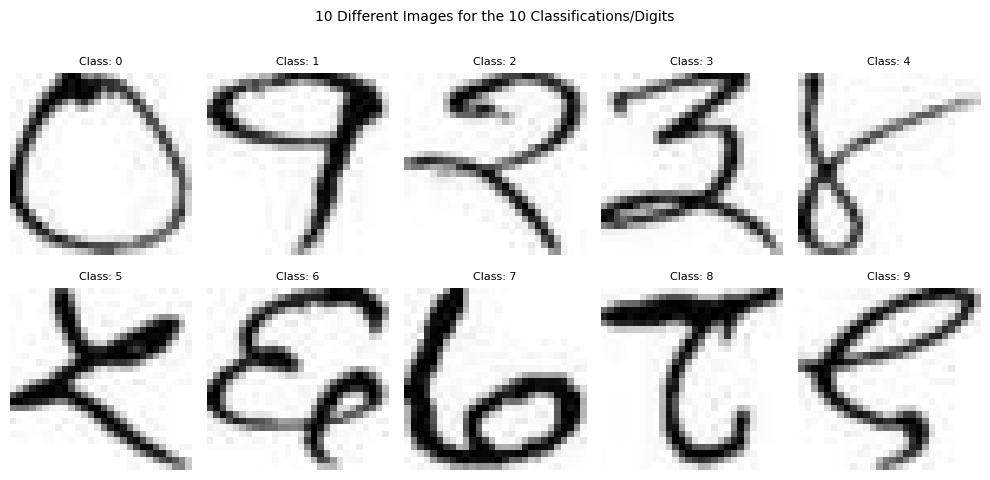

In [35]:
# Get the list of image names (assuming your filenames are available)
image_names = [filename for filename in os.listdir(test_dir) if filename.endswith('.jpg')]

# Initialize a list to store unique class labels
unique_labels = []

# Visualize some results along with image names, real labels, and predictions
plt.figure(figsize=(10, 5))  # Adjust the figure size as needed
for i, filename in enumerate(image_names):
    if len(unique_labels) == 10:
        break

    image = X_test[i].reshape(28, 28)
    label = np.argmax(y_test[i])  # Convert one-hot encoding to label

    if label not in unique_labels:
        plt.subplot(2, 5, len(unique_labels) + 1)
        plt.imshow(image, cmap='gray')
        plt.title(f"Class: {label}", fontsize=8)
        plt.axis('off')
        unique_labels.append(label)

plt.suptitle("10 Different Images for the 10 Classifications/Digits", fontsize=10, y=0.995)
plt.tight_layout()
plt.show()


### Creating Neural Network

In [17]:
# Define the sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Define the softmax function for the output layer
def softmax(x):
    exp_x = np.exp(x - np.max(x))  # Subtracting max(x) for numerical stability
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

# Experiment with a different activation function (e.g., ReLU)
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

In [18]:
# Define a neural network class
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate):
        # Initialize weights and biases
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate

        self.weights_input_hidden = np.random.randn(input_size, hidden_size)
        self.bias_hidden = np.zeros((1, hidden_size))
        self.weights_hidden_output = np.random.randn(hidden_size, output_size)
        self.bias_output = np.zeros((1, output_size))

   # Modify the forward and backward functions to use ReLU
    def forward(self, X):
        # Feedforward operation with ReLU activation for the hidden layer
        self.hidden_input = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        self.hidden_output = relu(self.hidden_input)
        self.output = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output
        self.output_probabilities = softmax(self.output)
        return self.output_probabilities

    def backward(self, X, y):
        # Backpropagation with ReLU derivative
        batch_size = X.shape[0]
        d_output = self.output_probabilities - y
        d_hidden = np.dot(d_output, self.weights_hidden_output.T) * relu_derivative(self.hidden_output)

        # Update weights and biases
        self.weights_hidden_output -= self.learning_rate * np.dot(self.hidden_output.T, d_output) / batch_size
        self.bias_output -= self.learning_rate * np.sum(d_output, axis=0, keepdims=True) / batch_size
        self.weights_input_hidden -= self.learning_rate * np.dot(X.T, d_hidden) / batch_size
        self.bias_hidden -= self.learning_rate * np.sum(d_hidden, axis=0, keepdims=True) / batch_size

    def train(self, X, y, epochs):
        for epoch in range(epochs):
            output = self.forward(X)
            self.backward(X, y)
            loss = -np.sum(y * np.log(output)) / len(X)
            print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss:.4f}")

    def predict(self, X):
        return np.argmax(self.forward(X), axis=1)

## **Step 2: Train Models on **

### Intial Model
*   input_size = 784  # 28x28 = 784 pixels
*   output_size = 10  # 10 classes
*   hidden_size = 2048 # 512 # 1024
*   learning_rate = 0.01 # 0.01 seems good, 0.1 is not the best
*   epochs = 1

#### Initialise and Train Model

##### Hyperparameters

In [38]:
# Create and train the neural network
input_size = 784  # 28x28 = 784 pixels
output_size = 10  # 10 classes

# these are the hyperparmeters
hidden_size = 2048 # 512 # 1024
learning_rate = 0.01 # 0.01 seems good, 0.1 is not the best
epochs = 1


In [21]:
nn_784_2048_10_01_1 = NeuralNetwork(input_size, hidden_size, output_size, learning_rate)

In [22]:
nn_784_2048_10_01_1.train(X_train, y_train, epochs)

Epoch 1/1, Loss: 4.5439


#### Predict using trained model

In [23]:
# Make predictions on new data
predictions = nn_784_2048_10_01_1.predict(X_test)
print("Predictions:", predictions)


Predictions: [5 4 1 6 6 1 6 6 6 6 2 6 1 3 6 6 3 6 1 4 6 6 6 6 6 6 3 5 6 4 6 6 6 6 4 1 6
 3 6 6 9 6 9 6 6 6 4 7 6 9 6 4 9 7 9 6 5 9 6 5 6 6 4 4 6 6 6 5 9 9 4 5 6 6
 6 4 6 7 4 6 9 4 6 4 6 6 6 6 6 5 7 2 6 6 6 5 2 7 7 5 6 2 1 1 8 5 5 5 5 6 1
 5 5 6 6 6 5 6 6 6 6 6 5 3 6 7 3 5 3 5 6 5 5 6 3 1 3 7 6 5 6 5 6 0 5 7 0 6
 5 6 8 1 1 7 5 7 5 6 7 0 6 2 5 4 3 7 0 6 5 1 5 6 1 4 8 7 0 4 0 5 6 5 6 5 1
 6 6 6 1 6 0 1 5 6 6 6 6 6 6 1 1 6 5 5 5 1 6 5 5 6 6 5 6 2 5 0 6 5 0 6 5 1
 5 5 0 6 6 5 0 7 0 0 5 5 5 5 5 0 6 7 5 6 5 0 0 5 5 0 1 7 5 5 6 2 5 5 1 8 5
 5 5 5 5 5 3 9 1 6 6 9 6 5 9 5 6 5 5 9 5 5 2 6 4 4 9 1 5 5 5 4 2 6 9 6 7 1
 6 4 5 6 9 9 1 9 9 4 4 1 6 4 6 6 1 2 2 0 6 2 1 9 2 1 5 0 2 6 2 2 1 5 2 6 4
 9 6 6 6 1 6 1 6 6 2 6 2 2 4 1 6 2 9 2 0 1 5 5 1 5 5 5 6 1 1 1 1 6 5 6 1 6
 5 1 5 5 5 0 6 5 1 1 5 5 6 1 1 1 5 5 1 5 6 6 1 5 0 6 5 5 1 6 5 1 6 5 1 5 6
 0 6 5 4 5 5 6 1 6 5 1 0 6 5 5 5 1 9 9 6 0 6 6 5 5 6 5 6 5 6 1 9 6]


#### Visualisation

Accuracy: 9.55%


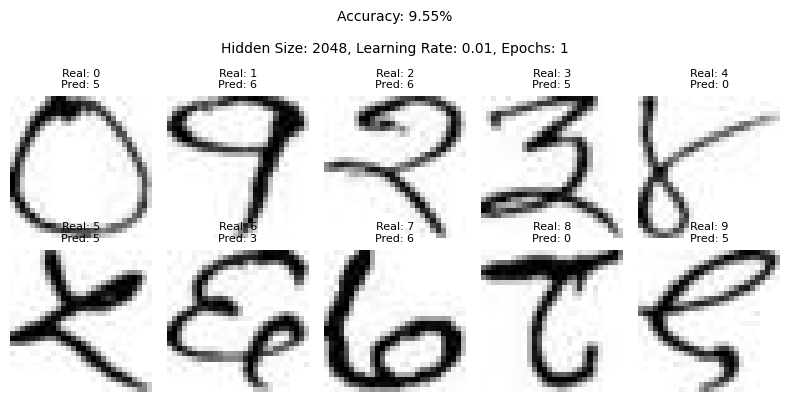

In [37]:
accuracy = np.mean(predictions == np.argmax(y_test, axis=1))
print(f"Accuracy: {accuracy * 100:.2f}%")
# Initialize a list to store unique class labels and their corresponding predictions
unique_labels = []

# Set the figure size and adjust the image size
plt.figure(figsize=(8, 4))  # Adjust the figure size as needed
for i, filename in enumerate(image_names):
    if len(unique_labels) == 10:
        break

    image = X_test[i].reshape(28, 28)
    label = np.argmax(y_test[i])  # Convert one-hot encoding to label
    prediction = predictions[i]

    if label not in unique_labels:
        plt.subplot(2, 5, len(unique_labels) + 1)
        plt.imshow(image, cmap='gray')
        plt.title(f"Real: {label}\nPred: {prediction}", fontsize=8)
        plt.axis('off')
        unique_labels.append(label)

# Add an overall title with accuracy
accuracy_text = f"Accuracy: {accuracy * 100:.2f}%\n\nHidden Size: {hidden_size}, Learning Rate: {learning_rate}, Epochs: {epochs}"
plt.suptitle(accuracy_text, fontsize=10, y=0.995)  # Adjust fontsize and position as needed
plt.tight_layout()
plt.show()


### Model - nn_784_2048_10_01_1000: Accuracy: 71.14%

*   input_size = 784  # 28x28 = 784 pixels
*   output_size = 10  # 10 classes
*   hidden_size = 2048 # 512 # 1024
*   learning_rate = 0.01 # 0.01 seems good, 0.1 is not the best
*   epochs = 1000

#### Initialise and Train Model

##### Hyperparameters

In [39]:
# Create and train the neural network
input_size = 784  # 28x28 = 784 pixels
output_size = 10  # 10 classes

# these are the hyperparmeters
hidden_size = 2048 # 512 # 1024
learning_rate = 0.01 # 0.01 seems good, 0.1 is not the best
epochs = 1000


In [40]:
nn_784_2048_10_01_1000 = NeuralNetwork(input_size, hidden_size, output_size, learning_rate)

In [41]:
nn_784_2048_10_01_1000.train(X_train, y_train, epochs)

Epoch 1/1000, Loss: 6.1890
Epoch 2/1000, Loss: 3.9923
Epoch 3/1000, Loss: 3.3868
Epoch 4/1000, Loss: 3.1466
Epoch 5/1000, Loss: 2.9847
Epoch 6/1000, Loss: 2.8793
Epoch 7/1000, Loss: 2.8225
Epoch 8/1000, Loss: 2.7909
Epoch 9/1000, Loss: 2.7673
Epoch 10/1000, Loss: 2.7454
Epoch 11/1000, Loss: 2.7239
Epoch 12/1000, Loss: 2.7028
Epoch 13/1000, Loss: 2.6820
Epoch 14/1000, Loss: 2.6615
Epoch 15/1000, Loss: 2.6414
Epoch 16/1000, Loss: 2.6217
Epoch 17/1000, Loss: 2.6024
Epoch 18/1000, Loss: 2.5836
Epoch 19/1000, Loss: 2.5651
Epoch 20/1000, Loss: 2.5470
Epoch 21/1000, Loss: 2.5292
Epoch 22/1000, Loss: 2.5118
Epoch 23/1000, Loss: 2.4946
Epoch 24/1000, Loss: 2.4777
Epoch 25/1000, Loss: 2.4612
Epoch 26/1000, Loss: 2.4449
Epoch 27/1000, Loss: 2.4288
Epoch 28/1000, Loss: 2.4131
Epoch 29/1000, Loss: 2.3976
Epoch 30/1000, Loss: 2.3824
Epoch 31/1000, Loss: 2.3676
Epoch 32/1000, Loss: 2.3529
Epoch 33/1000, Loss: 2.3385
Epoch 34/1000, Loss: 2.3243
Epoch 35/1000, Loss: 2.3104
Epoch 36/1000, Loss: 2.2967
E

#### Predict using trained model

In [42]:
# Make predictions on new data
predictions_784_2048_10_01_1000 = nn_784_2048_10_01_1000.predict(X_test)
print("Predictions:", predictions_784_2048_10_01_1000)


Predictions: [7 0 0 0 0 0 0 0 0 0 0 0 0 7 0 0 0 0 0 2 0 0 0 0 0 0 0 5 0 0 0 0 0 0 0 0 0
 0 0 0 7 0 0 0 1 1 9 9 9 1 1 1 1 7 1 1 1 1 5 1 1 1 1 1 1 1 1 1 1 1 1 1 9 1
 9 1 1 1 1 1 1 1 1 9 1 1 1 1 9 2 3 2 2 5 2 2 2 3 3 2 5 3 2 5 2 2 2 2 2 3 3
 2 3 2 3 2 2 2 2 2 2 2 2 3 3 1 5 2 2 3 3 6 3 7 3 3 6 3 9 3 2 3 3 2 3 3 1 2
 3 2 0 6 0 3 3 5 3 7 3 6 3 3 2 2 3 0 3 8 6 0 3 3 0 9 2 4 5 7 4 4 4 4 5 9 5
 4 4 4 7 4 9 5 5 5 4 4 4 4 6 4 4 4 4 7 6 4 4 7 2 5 4 4 4 5 4 4 4 4 4 4 5 5
 5 5 5 5 5 3 2 5 2 5 5 5 5 5 5 2 2 5 5 5 9 5 5 5 7 5 6 5 1 5 6 3 5 5 5 5 5
 2 3 2 5 4 6 6 6 6 6 6 3 6 2 9 8 6 6 6 6 6 6 9 9 9 2 6 6 6 9 6 6 8 9 4 6 6
 6 6 6 6 6 6 6 6 6 6 7 6 7 7 7 7 6 7 7 4 0 7 7 7 7 7 7 7 7 7 7 7 7 7 7 4 7
 7 7 7 7 2 7 7 7 7 0 6 7 7 7 7 7 0 7 7 8 8 8 8 8 8 8 6 8 8 8 9 8 8 6 8 8 8
 8 8 8 5 8 4 5 8 8 7 8 8 8 8 8 6 8 6 8 8 8 8 8 8 8 8 9 9 9 1 9 9 8 9 9 9 4
 4 9 9 4 9 9 9 9 9 9 6 5 9 9 9 8 9 9 9 9 6 9 9 9 9 9 9 9 9 9 9 9 9]


#### Visualisation

Accuracy: 71.14%


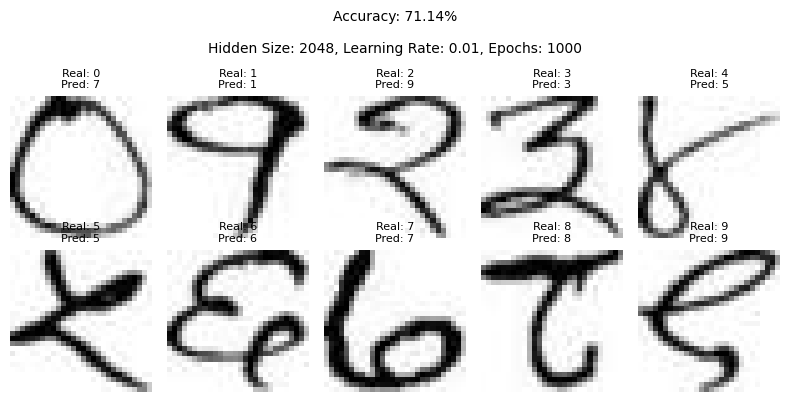

In [43]:
accuracy_784_2048_10_01_1000 = np.mean(predictions_784_2048_10_01_1000 == np.argmax(y_test, axis=1))
print(f"Accuracy: {accuracy_784_2048_10_01_1000 * 100:.2f}%")
# Initialize a list to store unique class labels and their corresponding predictions
unique_labels = []

# Set the figure size and adjust the image size
plt.figure(figsize=(8, 4))  # Adjust the figure size as needed
for i, filename in enumerate(image_names):
    if len(unique_labels) == 10:
        break

    image_784_2048_10_01_1000 = X_test[i].reshape(28, 28)
    label_784_2048_10_01_1000 = np.argmax(y_test[i])  # Convert one-hot encoding to label
    prediction_784_2048_10_01_1000 = predictions_784_2048_10_01_1000[i]

    if label_784_2048_10_01_1000 not in unique_labels:
        plt.subplot(2, 5, len(unique_labels) + 1)
        plt.imshow(image_784_2048_10_01_1000, cmap='gray')
        plt.title(f"Real: {label_784_2048_10_01_1000}\nPred: {prediction_784_2048_10_01_1000}", fontsize=8)
        plt.axis('off')
        unique_labels.append(label_784_2048_10_01_1000)

# Add an overall title with accuracy
accuracy_text_784_2048_10_01_1000 = f"Accuracy: {accuracy_784_2048_10_01_1000 * 100:.2f}%\n\nHidden Size: {hidden_size}, Learning Rate: {learning_rate}, Epochs: {epochs}"
plt.suptitle(accuracy_text_784_2048_10_01_1000, fontsize=10, y=0.995)  # Adjust fontsize and position as needed
plt.tight_layout()
plt.show()


# Sample

In [ ]:

import numpy as np

class Neuron:
  def __init__(self, weights, bias):
    self.weights = weights
    self.bias = bias



In [ ]:
def forward_propagate(self, X):
    # Feed forward input X through a network
    H = self.sigmoid(np.dot(X, self.W1))
    Y = self.sigmoid(np.dot(H, self.W2))
    return H, Y


In [ ]:
def back_propagate(self, X, H, Y, y_true):
    # Back propagate errors and update weights
    m = X.shape[0]
    error = Y - y_true
    dW2 = (1/m) * np.dot(H.T, error)
    dH = np.dot(error, self.W2.T) * self.sigmoid_derivative(H)
    dW1 = (1/m) * np.dot(X.T, dH)
    return dW1, dW2


In [ ]:
def initialize_weights(self, input_size, hidden_size, output_size):
    # Initialize weights randomly with a mean of 0
    W1 = np.random.randn(input_size, hidden_size)
    W2 = np.random.randn(hidden_size, output_size)
    return W1, W2


In [ ]:
def update_weights(self, dW1, dW2, learning_rate):
    # Update weights using gradient descent
    self.W1 -= learning_rate * dW1
    self.W2 -= learning_rate * dW2



In [ ]:
%ls
%cd /content/gdrive/Shareddrives/31005_Machine_Learning/trial
!ls
%pwd


dataset/
/content/gdrive/Shareddrives/31005_Machine_Learning/trial
dataset


'/content/gdrive/Shareddrives/31005_Machine_Learning/trial'

In [ ]:
# Define the source directory where the digit folders are located
source_dir = './dataset/numerals'  # Replace with the path to your images folder

# Define the destination directories for train, validation, and test splits
train_dir = './dataset/numerals_train'
validation_dir = './dataset/numerals_validation'
test_dir = './dataset/numerals_test'

# Create destination directories if they don't exist
for directory in [train_dir, validation_dir, test_dir]:
    if not os.path.exists(directory):
        os.makedirs(directory)

%pwd ## everything is like /content/gdrive/Shareddrives/31005_Machine_Learning/trial/dataset/numerals_test

'/content/gdrive/Shareddrives/31005_Machine_Learning/trial'

In [ ]:
%cd /content/gdrive/Shareddrives/31005_Machine_Learning/trial
# Initialize counters for each class
class_counts = {str(i): 0 for i in range(10)}
source_dir = '/content/gdrive/Shareddrives/31005_Machine_Learning/dataset/numerals'
# Iterate through each digit folder (0 to 9)
for digit in range(10):
    digit_folder = os.path.join(source_dir, str(digit))

    # Get a list of image files in the folder
    image_files = [filename for filename in os.listdir(digit_folder) if filename.endswith('.jpg')]

    # Split the image files into train, validation, and test sets
    train_files, temp_files = train_test_split(image_files, test_size=0.3, random_state=42)
    val_files, test_files = train_test_split(temp_files, test_size=0.5, random_state=42)

    # Copy images to the respective directories with modified names
    for filename in train_files:
        src_path = os.path.join(digit_folder, filename)
        dst_filename = f"{digit}_{filename}"  # Modified filename
        dst_path = os.path.join(train_dir, dst_filename)
        shutil.copy(src_path, dst_path)
        class_counts[str(digit)] += 1

    for filename in val_files:
        src_path = os.path.join(digit_folder, filename)
        dst_filename = f"{digit}_{filename}"  # Modified filename
        dst_path = os.path.join(validation_dir, dst_filename)
        shutil.copy(src_path, dst_path)
        class_counts[str(digit)] += 1

    for filename in test_files:
        src_path = os.path.join(digit_folder, filename)
        dst_filename = f"{digit}_{filename}"  # Modified filename
        dst_path = os.path.join(test_dir, dst_filename)
        shutil.copy(src_path, dst_path)
        class_counts[str(digit)] += 1


/content/gdrive/Shareddrives/31005_Machine_Learning/trial


In [ ]:
def load_and_preprocess_images_from_directory(directory):
    print(f"Loading and Preprocessing Data from {directory}")
    images = []
    labels = []
    problematic_files = []  # List to store problematic file names
    for filename in os.listdir(directory):
        if filename.endswith('.jpg'):
            parts = filename.split('_')  # Split the filename into label and original name parts
            # print(parts)
            # print(len(parts))
            if len(parts) == 3:
                # print("inside len(parts)")
                label = int(parts[0])  # Extract the label from the filename
                try:
                    # Load the image and preprocess it (resize and normalize)
                    image = Image.open(os.path.join(directory, filename)).convert('L')  # Convert to grayscale
                    image = image.resize((32, 32))  # Resize to a consistent size
                    image = np.array(image) / 255.0  # Normalize pixel values to [0, 1]

                    # Append the preprocessed image and label
                    images.append(image)
                    labels.append(label)
                    # print(f"image {image} and label {label}")
                except Exception as e:
                    # If there's an error while processing the image, log the filename
                    problematic_files.append(filename)
                    print(f"Error processing {filename}: {str(e)}")

    if problematic_files:
        print("Problematic files:", problematic_files)

    sys.stdout.flush()  # Force the output to be displayed immediately

    return np.array(images), np.array(labels)

In [ ]:
# Load and preprocess the images from train, validation, and test directories
X_train, y_train = load_and_preprocess_images_from_directory(train_dir)
X_val, y_val = load_and_preprocess_images_from_directory(validation_dir)
X_test, y_test = load_and_preprocess_images_from_directory(test_dir)

Loading and Preprocessing Data from ./dataset/numerals_train
Loading and Preprocessing Data from ./dataset/numerals_validation
Loading and Preprocessing Data from ./dataset/numerals_test


In [ ]:
print(f"X_train: {X_train} \ny_train: {y_train}")
print(f"X_train.shape: {X_train.shape} \ny_train.shape: {y_train.shape}")

X_train: [[[0.98431373 0.92941176 0.97647059 ... 1.         0.98823529 0.96862745]
  [0.9372549  0.90980392 1.         ... 0.98823529 0.97647059 0.96862745]
  [0.98431373 0.98039216 0.86666667 ... 0.98823529 0.97647059 0.97647059]
  ...
  [1.         0.96470588 0.95686275 ... 1.         0.99215686 0.97254902]
  [0.99215686 1.         1.         ... 0.99215686 0.97254902 0.95686275]
  [0.96862745 0.98823529 1.         ... 0.98039216 0.96862745 0.97254902]]

 [[1.         1.         0.97254902 ... 0.99607843 0.97647059 0.96862745]
  [0.98431373 0.99607843 0.99607843 ... 1.         0.98431373 0.96470588]
  [0.98039216 0.99607843 1.         ... 0.88235294 0.98823529 0.99215686]
  ...
  [1.         0.83137255 0.56078431 ... 0.99607843 1.         1.        ]
  [0.98823529 0.97254902 0.9254902  ... 0.99607843 1.         1.        ]
  [0.98039216 0.99607843 1.         ... 0.99607843 1.         1.        ]]

 [[1.         0.98823529 0.95686275 ... 0.99215686 0.99607843 1.        ]
  [0.98431373

In [ ]:
# from tensorflow.keras.utils import to_categorical

# Normalize images
X_train_normalized = X_train.astype('float32') / 255.0
X_val_normalized = X_val.astype('float32') / 255.0
X_test_normalized = X_test.astype('float32') / 255.0

# do not hot-code
# # One-hot encode labels
# y_train = to_categorical(y_train, 10)
# y_val = to_categorical(y_val, 10)
# y_test = to_categorical(y_test, 10)


In [ ]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        # Initialize weights and biases
        self.weights_input_hidden = np.random.randn(self.input_size, self.hidden_size)
        self.bias_hidden = np.zeros((1, self.hidden_size))
        self.weights_hidden_output = np.random.randn(self.hidden_size, self.output_size)
        self.bias_output = np.zeros((1, self.output_size))

    def forward(self, X):
      # Flatten the input
      X_flat = X.reshape(X.shape[0], -1)

      # # Forward pass
      # self.z_hidden = np.dot(X_flat, self.weights_input_hidden) + self.bias_hidden
      # self.a_hidden = sigmoid(self.z_hidden)
      # self.z_output = np.dot(self.a_hidden, self.weights_hidden_output) + self.bias_output
      # self.a_output = softmax(self.z_output)


      H = sigmoid(np.dot(X_flat, self.weights_input_hidden))
      Y = sigmoid(np.dot(H, self.weights_hidden_output))
      return H, Y

    # def backward(self, X, H, Y, y_true, learning_rate):

    #   m = X.shape[0]
    #    # Reshape X_batch to (batch_size, input_size)
    #   X_flat = X.reshape((m, -1))
    #   error = Y - y_true
    #   dW2 = (1/m) * np.dot(H.T, error)
    #   dH = np.dot(error, self.weights_hidden_output.T) * sigmoid_derivative(H)
    #   dW1 = (1/m) * np.dot(X.T, dH)
    #   return dW1, dW2

    # def backward(self, X, H, Y, y_true, learning_rate):
    #   m = X.shape[0]

    #   # Calculate the error
    #   error = Y
    #   error[np.arange(m), y_true] -= 1  # This adjusts the values for the true class indices

    #   # Calculate gradients
    #   dW2 = (1/m) * np.dot(H.T, error)
    #   dH = np.dot(error, self.W2.T) * self.sigmoid_derivative(H)
    #   dW1 = (1/m) * np.dot(X.T, dH)

    #   # Update weights using gradient descent
    #   self.update_weights(dW1, dW2, learning_rate)
    def backward(self, X, H, Y, y_true, learning_rate):
      m = X.shape[0]

      # Reshape X_batch to (batch_size, input_size)
      X_flat = X.reshape((m, -1))

      # Reshape y_true to have the same shape as Y
      y_true_one_hot = np.zeros_like(Y)
      y_true_one_hot[np.arange(m), y_true] = 1

      # Calculate the error
      error = Y - y_true_one_hot

      # Calculate gradients
      dW2 = (1/m) * np.dot(H.T, error)
      dH = np.dot(error, self.weights_hidden_output.T) * sigmoid_derivative(H)
      dW1 = (1/m) * np.dot(X_flat.T, dH)

      return dW1, dW2



      # # Backpropagation
      # m = X.shape[0]

      # # Reshape X_batch to (batch_size, input_size)
      # X_flat = X.reshape((m, -1))

      # # Calculate loss (cross-entropy loss for integer labels)
      # epsilon = 1e-10  # Small epsilon value
      # loss = -np.sum(np.log(self.a_output[np.arange(m), y] + epsilon)) / m

      # # Calculate gradients
      # d_output = np.zeros_like(self.a_output)
      # d_output[np.arange(m), y] = -(1 / self.a_output[np.arange(m), y]) / m
      # d_weights_hidden_output = np.dot(self.a_hidden.T, d_output)
      # d_bias_output = np.sum(d_output, axis=0, keepdims=True)
      # d_hidden = np.dot(d_output, self.weights_hidden_output.T) * (self.a_hidden * (1 - self.a_hidden))
      # d_weights_input_hidden = np.dot(X_flat.T, d_hidden)
      # d_bias_hidden = np.sum(d_hidden, axis=0)

      # # Gradient Clipping for d_weights_hidden_output
      # max_gradient = 1.0  # Set your desired maximum gradient value
      # if np.linalg.norm(d_weights_hidden_output) > max_gradient:
      #     d_weights_hidden_output = d_weights_hidden_output / np.linalg.norm(d_weights_hidden_output) * max_gradient


      # # Update weights and biases
      # self.weights_hidden_output -= learning_rate * d_weights_hidden_output
      # self.bias_output -= learning_rate * d_bias_output
      # self.weights_input_hidden -= learning_rate * d_weights_input_hidden
      # self.bias_hidden -= learning_rate * d_bias_hidden

      # return loss

    def cross_entropy_loss(self, y_true, y_pred):
      # y_true: True class labels (class indices, not one-hot encoded)
      # y_pred: Predicted class probabilities
      epsilon = 1e-15  # Small constant to avoid log(0)
      num_samples = len(y_true)

      # Select the predicted probabilities for the true class labels
      y_pred_for_true_labels = y_pred[np.arange(num_samples), y_true]

      # Calculate the cross-entropy loss
      loss = -np.sum(np.log(y_pred_for_true_labels + epsilon)) / num_samples

      return loss



    def train(self, X, y, learning_rate, epochs, batch_size):
        for epoch in range(epochs):
            # Forward and backward pass for each batch
            for i in range(0, X.shape[0], batch_size):
                X_batch = X[i:i + batch_size]
                y_batch = y[i:i + batch_size]
                output, y_pred = self.forward(X_batch)
                # print(f"y_pred {i}: {y_pred}")
                # print(f"y_batch {i}: {y_batch}")
                loss = self.cross_entropy_loss(y_batch, y_pred)
                dW1, dW2= self.backward(X_batch, output, y_pred, y_batch, learning_rate)

                # Print loss for monitoring
                if i % 1000 == 0:
                    print(f'Epoch {epoch + 1}/{epochs}, Batch {i}/{X.shape[0]}, Loss: {loss:.4f}')

            # Print epoch progress
            print(f'Epoch {epoch + 1}/{epochs} completed. Loss: {loss:.4f}')

    def predict(self, X):
        # Predict class labels for input data
        y_pred = self.forward(X)
        return np.argmax(y_pred, axis=1)


In [ ]:
# Define activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-np.clip(x, -500, 500)))  # Clip to avoid overflow

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

def sigmoid_derivative(x):
    # Derivative of the sigmoid function
    return x * (1 - x)

In [ ]:
def relu(x):
    # ReLU activation function
    return np.maximum(0, x)

def relu_derivative(x):
    # Derivative of the ReLU activation function
    return np.where(x > 0, 1, 0)

def he_initialization(input_size, output_size):
    he_variance = 2.0 / input_size
    weights = np.random.randn(input_size, output_size) * np.sqrt(he_variance)
    return weights

class NeuralNetworkReLu:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        # Initialize weights and biases using He initialization
        self.weights_input_hidden = he_initialization(self.input_size, self.hidden_size)
        self.bias_hidden = np.zeros((1, self.hidden_size))
        self.weights_hidden_output = he_initialization(self.hidden_size, self.output_size)
        self.bias_output = np.zeros((1, self.output_size))

    def forward(self, X):
        # Flatten the input
        X_flat = X.reshape(X.shape[0], -1)

        # Forward pass
        H = relu(np.dot(X_flat, self.weights_input_hidden) + self.bias_hidden)
        Y = sigmoid(np.dot(H, self.weights_hidden_output) + self.bias_output)  # Using sigmoid for output

        return H, Y

    def backward(self, X, H, Y, y_true, learning_rate):
        m = X.shape[0]

        # Reshape X_batch to (batch_size, input_size)
        X_flat = X.reshape((m, -1))

        # Reshape y_true to have the same shape as Y
        y_true_one_hot = np.zeros_like(Y)
        y_true_one_hot[np.arange(m), y_true] = 1

        # Calculate the error
        error = Y - y_true_one_hot

        # Calculate gradients
        dW2 = (1 / m) * np.dot(H.T, error)
        dH = np.dot(error, self.weights_hidden_output.T) * relu_derivative(H)
        dW1 = (1 / m) * np.dot(X_flat.T, dH)

        # Update weights and biases
        self.weights_hidden_output -= learning_rate * dW2
        self.bias_output -= learning_rate * np.sum(error, axis=0, keepdims=True)
        self.weights_input_hidden -= learning_rate * dW1
        self.bias_hidden -= learning_rate * np.sum(dH, axis=0, keepdims=True)

    def cross_entropy_loss(self, y_true, y_pred):
        epsilon = 1e-15
        num_samples = len(y_true)

        # Select the predicted probabilities for the true class labels
        y_pred_for_true_labels = y_pred[np.arange(num_samples), y_true]

        # Calculate the cross-entropy loss
        loss = -np.sum(np.log(y_pred_for_true_labels + epsilon)) / num_samples

        return loss

    def accuracy(self, y_true, y_pred):
      # Calculate the accuracy of predictions
      num_samples = len(y_true)
      correct_predictions = np.sum(y_true == y_pred)
      return correct_predictions / num_samples


    def train(self, X, y, learning_rate, epochs, batch_size):
      for epoch in range(epochs):
          total_loss = 0
          total_accuracy = 0
          num_batches = 0

          # Forward and backward pass for each batch
          for i in range(0, X.shape[0], batch_size):
              X_batch = X[i:i + batch_size]
              y_batch = y[i:i + batch_size]
              output, y_pred = self.forward(X_batch)
              loss = self.cross_entropy_loss(y_batch, y_pred)
              self.backward(X_batch, output, y_pred, y_batch, learning_rate)

              total_loss += loss
              total_accuracy += self.accuracy(y_batch, self.predict(X_batch))
              num_batches += 1

              # Print loss and accuracy for monitoring
              if i % 1000 == 0:
                  print(f'Epoch {epoch + 1}/{epochs}, Batch {i}/{X.shape[0]}, Loss: {loss:.4f}, Accuracy: {total_accuracy/num_batches:.4f}')

          # Calculate and print average loss and accuracy for the epoch
          average_loss = total_loss / num_batches
          average_accuracy = total_accuracy / num_batches
          print(f'Epoch {epoch + 1}/{epochs} completed. Average Loss: {average_loss:.4f}, Average Accuracy: {average_accuracy:.4f}')


    def predict(self, X):
        # Predict class labels for input data
        _, y_pred = self.forward(X)
        return np.argmax(y_pred, axis=1)


In [ ]:
# Set hyperparameters
input_size = 32 * 32  # Adjust this based on your image size
hidden_size = 64  # Number of neurons in the hidden layer
output_size = 10  # Number of output classes
learning_rate = 0.001
batch_size = 32
epochs = 500

In [ ]:
# Create the neural network
nn = NeuralNetwork(input_size, hidden_size, output_size)

In [ ]:
# Create the neural network
nnRL = NeuralNetworkReLu(input_size, hidden_size, output_size)

In [ ]:
# Set hyperparameters
input_size = 32 * 32  # Adjust this based on your image size
hidden_size = 32  # Number of neurons in the hidden layer
output_size = 10  # Number of output classes
learning_rate = 0.01
batch_size = 32
epochs = 500
# Create the neural network
nnRL = NeuralNetworkReLu(input_size, hidden_size, output_size)
nnRL.train(X_train_normalized, y_train, learning_rate, epochs, batch_size)

Epoch 1/500, Batch 0/2010, Loss: 0.6937, Accuracy: 1.0000
Epoch 1/500 completed. Average Loss: 1.6543, Average Accuracy: 0.5184
Epoch 2/500, Batch 0/2010, Loss: 3.7976, Accuracy: 0.0000
Epoch 2/500 completed. Average Loss: 2.2212, Average Accuracy: 0.3914
Epoch 3/500, Batch 0/2010, Loss: 3.7140, Accuracy: 0.0000
Epoch 3/500 completed. Average Loss: 2.2366, Average Accuracy: 0.3914
Epoch 4/500, Batch 0/2010, Loss: 3.6542, Accuracy: 0.0000
Epoch 4/500 completed. Average Loss: 2.2403, Average Accuracy: 0.3914
Epoch 5/500, Batch 0/2010, Loss: 3.5946, Accuracy: 0.0000
Epoch 5/500 completed. Average Loss: 2.2428, Average Accuracy: 0.3914
Epoch 6/500, Batch 0/2010, Loss: 3.5331, Accuracy: 0.0000
Epoch 6/500 completed. Average Loss: 2.2449, Average Accuracy: 0.3914
Epoch 7/500, Batch 0/2010, Loss: 3.4703, Accuracy: 0.0000
Epoch 7/500 completed. Average Loss: 2.2468, Average Accuracy: 0.3755
Epoch 8/500, Batch 0/2010, Loss: 3.4075, Accuracy: 0.0000
Epoch 8/500 completed. Average Loss: 2.2485, A

In [ ]:
nnRL.train(X_train_normalized, y_train, learning_rate, epochs, batch_size)

Epoch 1/500, Batch 0/2010, Loss: 0.6950, Accuracy: 1.0000
Epoch 1/500 completed. Average Loss: 1.1017, Average Accuracy: 0.2197
Epoch 2/500, Batch 0/2010, Loss: 1.3865, Accuracy: 0.0000
Epoch 2/500 completed. Average Loss: 1.6227, Average Accuracy: 0.0997
Epoch 3/500, Batch 0/2010, Loss: 1.8123, Accuracy: 0.0000
Epoch 3/500 completed. Average Loss: 1.9118, Average Accuracy: 0.1131
Epoch 4/500, Batch 0/2010, Loss: 2.0501, Accuracy: 0.0000
Epoch 4/500 completed. Average Loss: 2.0712, Average Accuracy: 0.1438
Epoch 5/500, Batch 0/2010, Loss: 2.1998, Accuracy: 0.0000
Epoch 5/500 completed. Average Loss: 2.1658, Average Accuracy: 0.1394
Epoch 6/500, Batch 0/2010, Loss: 2.2922, Accuracy: 0.0000
Epoch 6/500 completed. Average Loss: 2.2224, Average Accuracy: 0.1478
Epoch 7/500, Batch 0/2010, Loss: 2.3499, Accuracy: 0.0000
Epoch 7/500 completed. Average Loss: 2.2569, Average Accuracy: 0.1567
Epoch 8/500, Batch 0/2010, Loss: 2.3862, Accuracy: 0.0000
Epoch 8/500 completed. Average Loss: 2.2779, A

In [ ]:
nn.train(X_train_normalized, y_train, learning_rate, epochs, batch_size)

Epoch 1/50, Batch 0/2010, Loss: 0.2192
Epoch 1/50 completed. Loss: 3.7188
Epoch 2/50, Batch 0/2010, Loss: 0.2192
Epoch 2/50 completed. Loss: 3.7188
Epoch 3/50, Batch 0/2010, Loss: 0.2192
Epoch 3/50 completed. Loss: 3.7188
Epoch 4/50, Batch 0/2010, Loss: 0.2192
Epoch 4/50 completed. Loss: 3.7188
Epoch 5/50, Batch 0/2010, Loss: 0.2192
Epoch 5/50 completed. Loss: 3.7188
Epoch 6/50, Batch 0/2010, Loss: 0.2192
Epoch 6/50 completed. Loss: 3.7188
Epoch 7/50, Batch 0/2010, Loss: 0.2192
Epoch 7/50 completed. Loss: 3.7188
Epoch 8/50, Batch 0/2010, Loss: 0.2192
Epoch 8/50 completed. Loss: 3.7188
Epoch 9/50, Batch 0/2010, Loss: 0.2192
Epoch 9/50 completed. Loss: 3.7188
Epoch 10/50, Batch 0/2010, Loss: 0.2192
Epoch 10/50 completed. Loss: 3.7188
Epoch 11/50, Batch 0/2010, Loss: 0.2192
Epoch 11/50 completed. Loss: 3.7188
Epoch 12/50, Batch 0/2010, Loss: 0.2192
Epoch 12/50 completed. Loss: 3.7188
Epoch 13/50, Batch 0/2010, Loss: 0.2192
Epoch 13/50 completed. Loss: 3.7188
Epoch 14/50, Batch 0/2010, Los

In [ ]:
nn.train(X_train_normalized, y_train, learning_rate, epochs, batch_size)

Epoch 1/10, Batch 0/2010, Loss: 0.7304
Epoch 1/10 completed. Loss: 0.0031
Epoch 2/10, Batch 0/2010, Loss: 0.7304
Epoch 2/10 completed. Loss: 0.0031
Epoch 3/10, Batch 0/2010, Loss: 0.7304
Epoch 3/10 completed. Loss: 0.0031
Epoch 4/10, Batch 0/2010, Loss: 0.7304
Epoch 4/10 completed. Loss: 0.0031
Epoch 5/10, Batch 0/2010, Loss: 0.7304
Epoch 5/10 completed. Loss: 0.0031
Epoch 6/10, Batch 0/2010, Loss: 0.7304
Epoch 6/10 completed. Loss: 0.0031
Epoch 7/10, Batch 0/2010, Loss: 0.7304
Epoch 7/10 completed. Loss: 0.0031
Epoch 8/10, Batch 0/2010, Loss: 0.7304
Epoch 8/10 completed. Loss: 0.0031
Epoch 9/10, Batch 0/2010, Loss: 0.7304
Epoch 9/10 completed. Loss: 0.0031
Epoch 10/10, Batch 0/2010, Loss: 0.7304
Epoch 10/10 completed. Loss: 0.0031


In [ ]:
nn.train(X_train_normalized, y_train, learning_rate, epochs, batch_size)

Epoch 1/10, Batch 0/2010, Loss: 2.2275
Epoch 1/10 completed. Loss: 0.0297
Epoch 2/10, Batch 0/2010, Loss: 2.2275
Epoch 2/10 completed. Loss: 0.0297
Epoch 3/10, Batch 0/2010, Loss: 2.2275
Epoch 3/10 completed. Loss: 0.0297
Epoch 4/10, Batch 0/2010, Loss: 2.2275
Epoch 4/10 completed. Loss: 0.0297
Epoch 5/10, Batch 0/2010, Loss: 2.2275
Epoch 5/10 completed. Loss: 0.0297
Epoch 6/10, Batch 0/2010, Loss: 2.2275
Epoch 6/10 completed. Loss: 0.0297
Epoch 7/10, Batch 0/2010, Loss: 2.2275
Epoch 7/10 completed. Loss: 0.0297
Epoch 8/10, Batch 0/2010, Loss: 2.2275
Epoch 8/10 completed. Loss: 0.0297
Epoch 9/10, Batch 0/2010, Loss: 2.2275
Epoch 9/10 completed. Loss: 0.0297
Epoch 10/10, Batch 0/2010, Loss: 2.2275
Epoch 10/10 completed. Loss: 0.0297


In [ ]:
nn.train(X_train_normalized, y_train, learning_rate, epochs, batch_size)

Epoch 1/10, Batch 0/2010, Loss: 3.5961
Epoch 1/10 completed. Loss: 0.0212
Epoch 2/10, Batch 0/2010, Loss: 3.5961
Epoch 2/10 completed. Loss: 0.0212
Epoch 3/10, Batch 0/2010, Loss: 3.5961
Epoch 3/10 completed. Loss: 0.0212
Epoch 4/10, Batch 0/2010, Loss: 3.5961
Epoch 4/10 completed. Loss: 0.0212
Epoch 5/10, Batch 0/2010, Loss: 3.5961
Epoch 5/10 completed. Loss: 0.0212
Epoch 6/10, Batch 0/2010, Loss: 3.5961
Epoch 6/10 completed. Loss: 0.0212
Epoch 7/10, Batch 0/2010, Loss: 3.5961
Epoch 7/10 completed. Loss: 0.0212
Epoch 8/10, Batch 0/2010, Loss: 3.5961
Epoch 8/10 completed. Loss: 0.0212
Epoch 9/10, Batch 0/2010, Loss: 3.5961
Epoch 9/10 completed. Loss: 0.0212
Epoch 10/10, Batch 0/2010, Loss: 3.5961
Epoch 10/10 completed. Loss: 0.0212


In [ ]:
nn.train(X_train_normalized, y_train, learning_rate, epochs, batch_size)

Epoch 1/10, Batch 0/2010, Loss: 10.5866
Epoch 1/10 completed. Loss: 0.1911
Epoch 2/10, Batch 0/2010, Loss: 10.5866
Epoch 2/10 completed. Loss: 0.1911
Epoch 3/10, Batch 0/2010, Loss: 10.5866
Epoch 3/10 completed. Loss: 0.1911
Epoch 4/10, Batch 0/2010, Loss: 10.5866
Epoch 4/10 completed. Loss: 0.1911
Epoch 5/10, Batch 0/2010, Loss: 10.5866
Epoch 5/10 completed. Loss: 0.1911
Epoch 6/10, Batch 0/2010, Loss: 10.5866
Epoch 6/10 completed. Loss: 0.1911
Epoch 7/10, Batch 0/2010, Loss: 10.5866
Epoch 7/10 completed. Loss: 0.1911
Epoch 8/10, Batch 0/2010, Loss: 10.5866
Epoch 8/10 completed. Loss: 0.1911
Epoch 9/10, Batch 0/2010, Loss: 10.5866
Epoch 9/10 completed. Loss: 0.1911
Epoch 10/10, Batch 0/2010, Loss: 10.5866
Epoch 10/10 completed. Loss: 0.1911


In [ ]:
nn.train(X_train_normalized, y_train, learning_rate, epochs, batch_size)

y_pred 0: [[0.54217691 0.0053759  0.99174591 ... 0.99102187 0.97066692 0.99915547]
 [0.54094469 0.00546152 0.99226616 ... 0.9924844  0.97481272 0.99928091]
 [0.50116006 0.0054941  0.99106205 ... 0.99183902 0.97062222 0.99913301]
 ...
 [0.50906432 0.00565192 0.99304281 ... 0.98932106 0.9722432  0.9992248 ]
 [0.52361355 0.00780445 0.9912541  ... 0.99121751 0.97274402 0.99927867]
 [0.51632734 0.00724197 0.99129882 ... 0.99059383 0.97616082 0.99924388]]
y_batch 0: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Epoch 1/10, Bat

In [ ]:
nn.train(X_train_normalized, y_train, learning_rate, epochs, batch_size)

y_pred 0: [[1.03702248e-03 1.19909857e-06 1.47404437e-03 ... 9.81282905e-01
  4.71884886e-03 3.60414844e-06]
 [8.63751613e-04 1.16967707e-06 1.58342502e-03 ... 9.84136677e-01
  2.32484524e-03 4.23262754e-06]
 [1.06785751e-03 1.79640123e-06 2.01530145e-03 ... 9.78947248e-01
  3.20603329e-03 5.51777178e-06]
 ...
 [9.32889525e-04 1.41096123e-06 1.96517264e-03 ... 9.80737081e-01
  2.21129708e-03 4.75257890e-06]
 [8.91742920e-04 1.50584397e-06 1.97415820e-03 ... 9.78541801e-01
  2.82397984e-03 4.32929861e-06]
 [8.20662008e-04 1.52865695e-06 1.93515100e-03 ... 9.76607745e-01
  3.26978371e-03 4.08980730e-06]]
y_batch 0: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0

<ipython-input-103-ba5d5fe42e2b>:38: RuntimeWarning: divide by zero encountered in divide
  d_output[np.arange(m), y] = -(1 / self.a_output[np.arange(m), y]) / m
<ipython-input-103-ba5d5fe42e2b>:41: RuntimeWarning: invalid value encountered in multiply
  d_hidden = np.dot(d_output, self.weights_hidden_output.T) * (self.a_hidden * (1 - self.a_hidden))
<ipython-input-103-ba5d5fe42e2b>:48: RuntimeWarning: invalid value encountered in divide
  d_weights_hidden_output = d_weights_hidden_output / np.linalg.norm(d_weights_hidden_output) * max_gradient


y_pred 1024: [[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
y_batch 1024: [5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6]
y_pred 1280: [[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
y_batch 1280: [6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6

In [ ]:
print(X_train.shape)
print(X_train.shape[0])
print(X_train_normalized.shape)
print(X_train_normalized.shape[0])


print(X_val_normalized.shape[0])

print(X_test_normalized.shape[0])


(2010, 32, 32)
2010
(2010, 32, 32)
2010
430
440


In [ ]:
nn.train(X_train_normalized, y_train, learning_rate, epochs, batch_size)

y_pred 0: [[9.21149707e-01 1.74709263e-07 3.26576818e-06 1.92587118e-06
  3.11390515e-07 1.79584260e-02 6.02386542e-02 6.45848347e-04
  1.65430160e-06 3.19342588e-08]
 [9.43496641e-01 1.27458920e-07 3.27247711e-06 1.69750008e-06
  2.33161775e-07 1.50207734e-02 4.10253650e-02 4.50734879e-04
  1.13111191e-06 2.35691839e-08]
 [9.44262530e-01 1.27628509e-07 2.95541572e-06 2.14353460e-06
  2.58590291e-07 1.42845829e-02 4.09845084e-02 4.61438791e-04
  1.42978482e-06 2.53235143e-08]
 [9.17395560e-01 1.50279267e-07 3.52793710e-06 1.76503156e-06
  2.92847999e-07 2.29817192e-02 5.89726816e-02 6.42995207e-04
  1.28053702e-06 2.77951971e-08]
 [9.25603542e-01 1.87361362e-07 3.54006681e-06 2.26152146e-06
  3.16186634e-07 1.87779510e-02 5.49666420e-02 6.43826986e-04
  1.69455168e-06 3.81183339e-08]
 [9.33200400e-01 1.58545198e-07 3.04266935e-06 2.14193365e-06
  3.02780176e-07 1.68674047e-02 4.93620437e-02 5.63071836e-04
  1.40289672e-06 3.04800266e-08]
 [9.32999084e-01 1.54706567e-07 2.74448498e-06 2

<ipython-input-83-aa99b4f79a76>:38: RuntimeWarning: divide by zero encountered in divide
  d_output[np.arange(m), y] = -(1 / self.a_output[np.arange(m), y]) / m
<ipython-input-83-aa99b4f79a76>:41: RuntimeWarning: invalid value encountered in multiply
  d_hidden = np.dot(d_output, self.weights_hidden_output.T) * (self.a_hidden * (1 - self.a_hidden))
<ipython-input-83-aa99b4f79a76>:48: RuntimeWarning: invalid value encountered in divide
  d_weights_hidden_output = d_weights_hidden_output / np.linalg.norm(d_weights_hidden_output) * max_gradient


Streaming output truncated to the last 5000 lines.
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [n

(2010, 32, 32)
(2010,)
(440, 32, 32)
0
(2010, 32, 32)
(2010,)
(440, 32, 32)
0


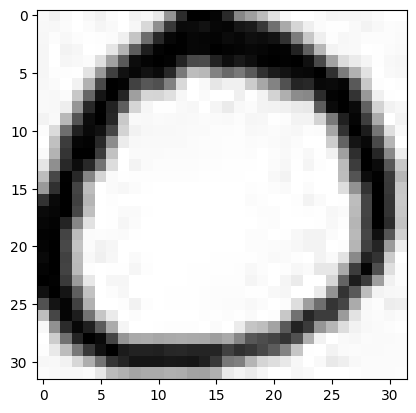

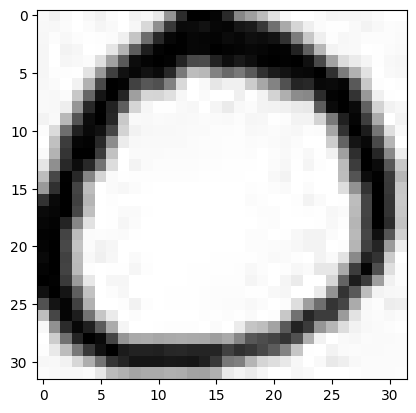

In [ ]:
import matplotlib.pyplot as plt
print(np.shape(X_train))
print(np.shape(y_train))
print(np.shape(X_test))
plt.imshow(X_test[9], cmap='gray')
print(y_test[9])

print(np.shape(X_train_normalized))
print(np.shape(y_train))
print(np.shape(X_test_normalized))
plt.figure();
plt.imshow(X_test_normalized[9], cmap='gray')
print(y_test[9])



# Below is from Scaler
https://www.scaler.com/topics/deep-learning/how-to-build-a-neural-network/

In [ ]:
import numpy as np

class Model:
  def __init__(self, input_size, hidden_size, output_size):
    self.W1, self.W2 = self.initialize_weights(input_size, hidden_size, output_size)

  def sigmoid(self, x):
    # Activation function
    return 1/(1+np.exp(-x))

  def sigmoid_derivative(self, x):
    # Derivative of the sigmoid function
    return x * (1 - x)

  def initialize_weights(self, input_size, hidden_size, output_size):
    # Initialize weights randomly with a mean of 0
    W1 = np.random.randn(input_size, hidden_size)
    W2 = np.random.randn(hidden_size, output_size)
    return W1, W2

  def forward_propagate(self, X):
    # Feed forward input X through a network
    H = self.sigmoid(np.dot(X, self.W1))
    Y = self.sigmoid(np.dot(H, self.W2))
    return H, Y


  def back_propagate(self, X, H, Y, y_true):
    # Back propagate errors and update weights
    m = X.shape[0]
    error = Y - y_true
    dW2 = (1/m) * np.dot(H.T, error)
    dH = np.dot(error, self.W2.T) * self.sigmoid_derivative(H)
    dW1 = (1/m) * np.dot(X.T, dH)
    return dW1, dW2

  def update_weights(self, dW1, dW2, learning_rate):
    # Update weights using gradient descent
    self.W1 -= learning_rate * dW1
    self.W2 -= learning_rate * dW2

  def optimize(self, X, y_true, num_epochs, learning_rate, batch_size):
    for epoch in range(num_epochs):
      print(f"Epoch {epoch + 1}/{num_epochs}")
      # Shuffle data
      shuffled_indices = np.random.permutation(X.shape[0])
      X = X[shuffled_indices]
      y_true = y_true[shuffled_indices]

      # Split data into mini-batches
      num_batches = X.shape[0] // batch_size
      for batch_index in range(num_batches):
        start_index = batch_index * batch_size
        end_index = start_index + batch_size
        X_batch = X[start_index:end_index]
        y_batch = y_true[start_index:end_index]

        # Feed forward
        H, Y = self.forward_propagate(X_batch)

        # Back propagate
        dW1, dW2 = self.back_propagate(X_batch, H, Y, y_batch)

        # Update weights
        self.update_weights(dW1, dW2, learning_rate)
        print(f"Feed forward: H {H} and Y {Y} forwa\n Back Prop: dW1 {dW1} and dW2 {dW2}")

    return


In [ ]:
# Create model
model = Model(input_size=784, hidden_size=64, output_size=10) ## input_size=784 because image size is 28 x 28


In [ ]:
# Create model
model = Model(input_size=1024, hidden_size=64, output_size=10) ## input_size=784 because image size is 32 x 32

In [ ]:
# Train model
model.optimize(X_train, y_train, num_epochs=10, learning_rate=0.01, batch_size=6)

Epoch 1/10


ValueError: ignored

In [ ]:
# Evaluate model
H, Y = model.forward_propagate(X_test)
predictions = np.argmax(Y, axis=1)
accuracy = np.mean(predictions == np.argmax(y_test, axis=1))
print(f'Accuracy: {accuracy:.4f}')